In [ ]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Read the CSV File Using Pandas read_csv function
df = pd.read_csv('clinical-data-for Alzheimers.csv')

#print the concise summary of the dataset
df.info

<bound method DataFrame.info of        Subject  Gender MMSE       Age  CDR Memory                Result
0     OAS30124  female   16  79.14579  1.0      1         'AD Dementia'
1     OAS30124  female   21  79.14579  0.5    0.5         'AD Dementia'
2     OAS31129  female   20  68.07666  1.0      1         'AD Dementia'
3     OAS31129  female   28  68.07666  1.0      1         'AD Dementia'
4     OAS31129  female   29  68.07666  0.5    0.5         'AD Dementia'
...        ...     ...  ...       ...  ...    ...                   ...
1224  OAS30397    male   22  68.90075  1.0      1         'AD Dementia'
1225  OAS30397    male   16  68.90075  1.0      1         'AD Dementia'
1226  OAS30886    male   28  67.77276  0.5    0.5         'AD Dementia'
1227  OAS30954  female   17  80.06844  1.0      1         'AD Dementia'
1228  OAS30016    male   26  76.96646  0.5      1  'uncertain dementia'

[1229 rows x 7 columns]>

In [ ]:
print("Total Rows and Columns (Rows,Columns) : ", df.shape)

#print first five rows of the dataset
df.head(10)

Total Rows and Columns (Rows,Columns) :  (1229, 7)


,Subject,Gender,MMSE,Age,CDR,Memory,Result
0,OAS30124,female,16,79.145790,1.0,1,'AD Dementia'
1,OAS30124,female,21,79.145790,0.5,0.5,'AD Dementia'
2,OAS31129,female,20,68.076660,1.0,1,'AD Dementia'
3,OAS31129,female,28,68.076660,1.0,1,'AD Dementia'
4,OAS31129,female,29,68.076660,0.5,0.5,'AD Dementia'
5,OAS31129,female,29,68.076660,0.5,1,'AD Dementia'
6,OAS30865,female,24,73.697464,2.0,2,'AD Dementia'
7,OAS30865,female,28,73.697464,0.5,1,'AD Dementia'
8,OAS31003,male,30,63.926080,0.5,0.5,'AD Dementia'
9,OAS31003,male,30,63.926080,1.0,0.5,'AD Dementia'


In [ ]:
#print concise summary of the dataset
df.describe()

,Age,CDR
count,1229.000000,1229.000000
mean,72.900069,0.702604
std,7.739166,0.415548
min,47.605750,0.000000
25%,67.550995,0.500000
50%,73.013010,0.500000
75%,78.650240,1.000000
max,95.567420,3.000000


In [ ]:
df.isna().sum()

Subject    0
Gender     0
MMSE       0
Age        0
CDR        0
Memory     0
Result     0
dtype: int64

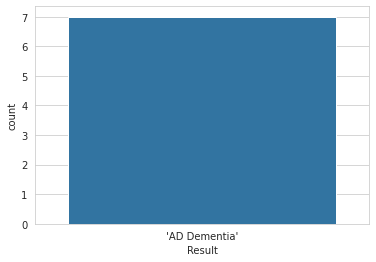

In [ ]:
#see how many people have Alzheimer
sns.set_style("whitegrid")
ex_df= df.loc[df['CDR'] == 3]
sns.countplot(x='Result', data = ex_df)

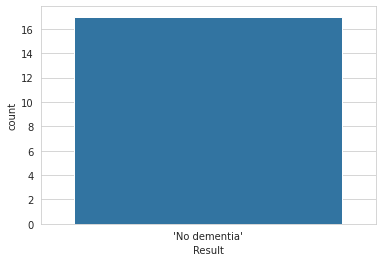

In [ ]:
#see how many people have No Dementia
sns.set_style("whitegrid")
ex_df= df.loc[df['CDR'] == 0]
sns.countplot(x='Result', data = ex_df)

(50.0, 100.0)

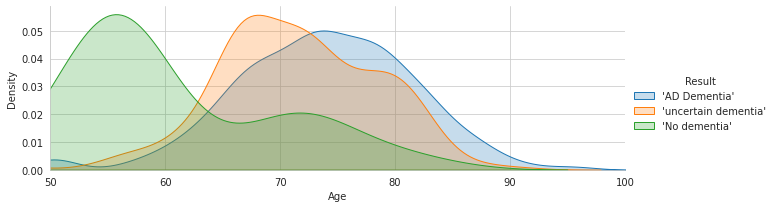

In [ ]:
#Age vs Non-demented and demented
facet= sns.FacetGrid(df,hue="Result", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)


###**Implementation of Machine Learning Algorithms**

In [ ]:
#Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

### **1. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_col_names = ["Gender", "MMSE", "Age", "CDR", "Memory"]
predicted_class_names = ['Result']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

clf_dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state= 42)
clf_dtc.fit(X_train, y_train)

y_pred = clf_dtc.predict(X_test)
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of the model: 76.96476964769647


###**2. Random Forest Classifier**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_col_names = ["Gender", "MMSE", "Age", "CDR", "Memory"]
predicted_class_names = ['Result']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

clf_dtc = RandomForestClassifier( n_estimators = 100, criterion = 'entropy', random_state= 42)
clf_dtc.fit(X_train, y_train.ravel())

y_pred = clf_dtc.predict(X_test)
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of the model: 75.33875338753387


###**3. Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_col_names = ["Gender", "MMSE", "Age", "CDR", "Memory"]
predicted_class_names = ['Result']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

gradientBooster = GradientBoostingClassifier(n_estimators = 3, max_depth = 2, learning_rate = 1.0)

model = gradientBooster.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
print("Accuracy of the model:", metrics.accuracy_score(y_pred, y_test)*100)

Accuracy of the model: 80.21680216802169


###**4. SVM (Support Vector Machine)**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_col_names = ["Gender", "MMSE", "Age", "CDR", "Memory"]
predicted_class_names = ['Result']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

svm = SVC(kernel = 'linear', C = 0.1, random_state = 42)
svm.fit(X_train, y_train.ravel())
pred = svm.predict(X_test)
print('Accuracy of the model:', metrics.accuracy_score(y_test, pred)*100)

Accuracy of the model: 79.94579945799458


###**Heat Map**


In [ ]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

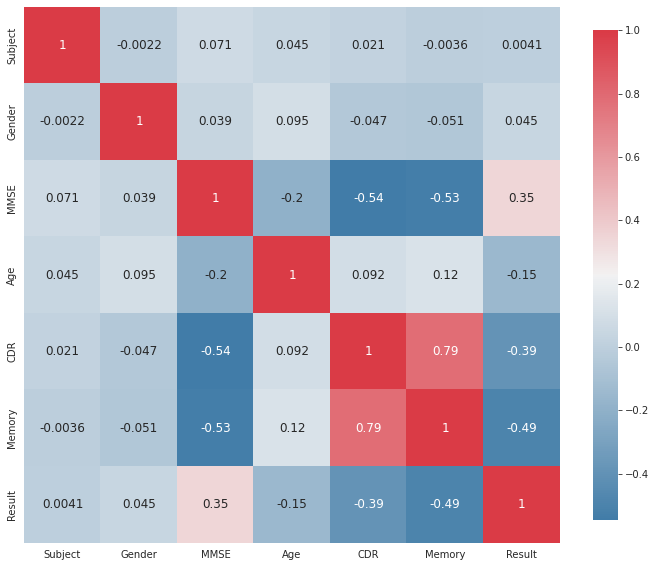

In [ ]:
plot_correlation_map(df)

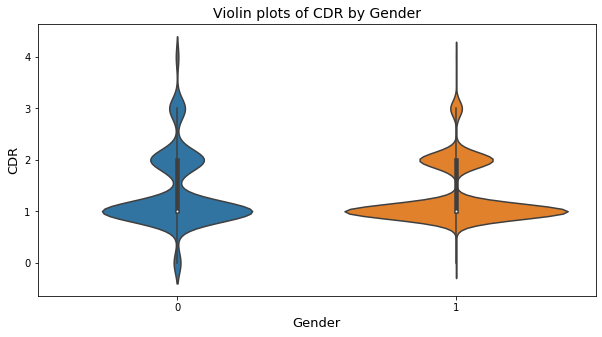

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Gender', y='CDR', data=df)
plt.title('Violin plots of CDR by Gender',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('CDR',fontsize=13)
plt.show()

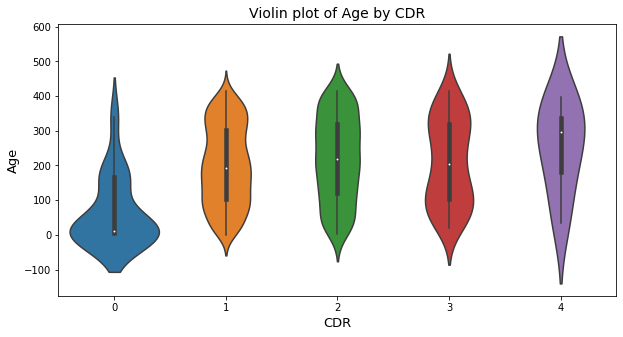

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='CDR', y='Age', data=df)
plt.title('Violin plot of Age by CDR',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

###**Implementation of Ensemble Learning Techniques**

> In this phase, we will look at some basic Ensemble Techniques namely:
*   Max Voting
*   Averaging


**1. Max Voting:** 

> The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

**Voting Classifier**

> A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.


**Voting Classifier supports two types of votings:-**


**Hard Voting:** 

> In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output *class(A, A, B)*, so here the majority predicted *A* as output. Hence *A* will be the final prediction.

**Soft Voting:** 

> In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for *class A = (0.30, 0.47, 0.53)* and *B = (0.20, 0.32, 0.40)*. So the average for class A is *0.4333* and B is *0.3067*, the winner is clearly class *A* because it had the highest probability averaged by each classifier.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

feature_col_names = ["Gender", "MMSE", "Age", "CDR", "Memory"]
predicted_class_names = ['Result']

X = df[feature_col_names].values
y = df[predicted_class_names].values

model1 = RandomForestClassifier(random_state = 42)
model2 = tree.DecisionTreeClassifier(random_state = 42)
model3 = SVC()
model4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
model = VotingClassifier(estimators=[('rf', model1), ('dt', model2), ('svc', model3), ('gbc', model4)], voting = 'hard')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

model.fit(X_train,y_train.ravel())
accuracy = model.score(X_test,y_test.ravel())
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.7696476964769647


**2. Averaging**

> Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction.

In [ ]:
model1= RandomForestClassifier()
model2 = tree.DecisionTreeClassifier()
model3 = SVC()
model4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

feature_col_names = ["Gender", "MMSE", "Age", "CDR", "Memory"]
predicted_class_names = ['Result']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

pred1 = model1.score(X_test, y_test.ravel())
pred2 = model2.score(X_test, y_test.ravel())
pred3 = model3.score(X_test, y_test.ravel())
pred4 = model4.score(X_test, y_test.ravel())

finalpred = (pred1 + pred2 + pred3 + pred4) / 4.0

print("Accuracy of the model:", finalpred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the model: 0.744579945799458


**3. Weighted Averaging**

> This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction.

In [ ]:
model1 = RandomForestClassifier()
model2 = tree.DecisionTreeClassifier()
model3 = SVC()
model4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

feature_col_names = ["Gender", "MMSE", "Age", "CDR", "Memory"]
predicted_class_names = ['Result']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

pred1 = model1.score(X_test, y_test.ravel())
pred2 = model2.score(X_test, y_test.ravel())
pred3 = model3.score(X_test, y_test.ravel())
pred4 = model4.score(X_test, y_test.ravel())

finalpred = (pred1*1 + pred2*3 + pred3*2 + pred4*4)/(1+2+3+4)
print("Accuracy of the model:", finalpred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the model: 0.7544715447154472


###**Advanced Ensemble Learning**

**1. Bagging Meta- Estimator:**

> Bagging meta-estimator is an ensembling algorithm that can be used for both classification (BaggingClassifier) and regression (BaggingRegressor) problems. It follows the typical bagging technique to make predictions. 
Following are the steps for the bagging meta-estimator algorithm:

> 1. Random subsets are created from the original dataset (Bootstrapping).
> 2. The subset of the dataset includes all features. 
> 3. A user-specified base estimator is fitted on each of these smaller sets. 
> 4. Predictions from each model are combined to get the final result.

**Parameters used in this algorithm -**

**base_estimator:**

It defines the base estimator to fit on random subsets of the dataset.
When nothing is specified, the base estimator is a decision tree.

**n_estimators:**

It is the number of base estimators to be created.
The number of estimators should be carefully tuned as a large number would take a very long time to run, while a very small number might not provide the best results.

**max_samples:**

This parameter controls the size of the subsets.
It is the maximum number of samples to train each base estimator.
max_features:
Controls the number of features to draw from the whole dataset.
It defines the maximum number of features required to train each base estimator.

**n_jobs:**

The number of jobs to run in parallel.
Set this value equal to the cores in your system.
If -1, the number of jobs is set to the number of cores.

**random_state:**

It specifies the method of random split. When random state value is same for two models, the random selection is same for both models.
This parameter is useful when you want to compare different models.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_col_names = ["Gender", "MMSE", "Age", "CDR", "Memory"]
predicted_class_names = ['Result']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state = 42))
model.fit(X_train,y_train.ravel())

pred = model.predict(X_test)
print('Accuracy of the model:', metrics.accuracy_score(y_test, pred)*100)

Accuracy of the model: 74.25474254742548
